# Исследование объявлений о продаже квартир

Имеются данные об объявлениях о продаже квартир в Санкт-Петербурге и области за несколько лет. 

В проекте будут выявлены параметры, влияющие на рыночную стоимость квартиры.

### Шаг 1. Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [2]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


### Вывод

По описаниям таблицы видно, что данные не во всех столбцах присутствуют полностью. Необходимо будет заменить эти пропущенные значения. Такие пропуски возможны из-за наличия сбоев при выгрузке базы, или же пользователи намеренно не указали какие-то данные. 

Также присутствуют данные, тип которых нужно изменить.

И, наконец, присутствуют значения, которые выглядят подозрительно (например, минимальное число комнат - 0)

### Шаг 2. Предобработка данных

Заменим отсутствующие данные в столбце ceiling_height на медианное значение для каждого населенного пункта. 

В значениях locality_name также есть пропуски. Заменим эти пропуски на Unknown. 

In [3]:
#Заполним пропущенные данные для населенных пунктов
data['locality_name'].fillna('Unknown', inplace=True)

#сгруппируем данные по медиане высоты потолков в каждом населенном пункте
name_to_height = data.groupby('locality_name')['ceiling_height'].median().to_dict()

#Предварительно заполним пропуски -1 для использования этого значения в следующем шаге
data['ceiling_height'].fillna(-1, inplace=True)

#Функция для заполнения -1 медианными значениями по населенным пунктам
def change_na(row):
    if row['ceiling_height'] == -1:
        return name_to_height[row['locality_name']]
    return row['ceiling_height']

data['ceiling_height'] = data.apply(change_na, axis=1)

#Заполним оставшиеся пустые значения медианой по всему датасету
data['ceiling_height'].fillna(data['ceiling_height'].median(), inplace=True)


В столбце balcony заменим NaN на нули (если не указано количество балконов, то, скорее всего, их нет)

In [4]:
data['balcony'].fillna(0, inplace=True)

В стобце is_apartment пропущенные значения вероятнее всего означают, что помещение жилое (т.к. таких столбцов много и длля этих пропущенных значений имеются данные по жилой площади, площади кухни и т.д.)

In [5]:
data['is_apartment'].fillna(False, inplace=True)


В столбце floors_total заполним пропуски следуюдщим образом: уеличим на единицу соответствующее значение в столбце floor. Будем считать, что если этажность дома неизвестна, пусть квартира будет находиться не на крайнем этаже.

In [6]:
data['floors_total'].fillna(-1, inplace=True)
data['floors_total'] = data['floors_total'].astype('int')

def floor_plus_one(row):
    if row['floors_total'] == -1:
        row['floor_total'] = int(row['floor']) + 1 # Прибавляем один этаж к указанному этажу
        return row['floor_total']
    return row['floors_total']
    
data['floors_total'] = data.apply(floor_plus_one, axis=1)


Заполним пустые значения в столбцах living_area и kitchen_area. Будем руководствоваться следующим. Определим медианное значение всех площадей: общей, кухни и жилой. Затем посчитаем коэффициент жилой площади как отношение общей к жилой. Таким же образом найдем коэффициент для кухни. Пустые значения в столбце living_area заполним отношением общей площади к жилому коэффициенту. Для kitchen_area - то же самое. 

In [7]:
# Вычислим коэффициенты площади
total_area_median = data['total_area'].median()
live_coeff = total_area_median / data['living_area'].median()
kitchen_coeff = total_area_median / data['kitchen_area'].median()

#Заменим пустые значения в столбцах kitchen_area и living_area на -1 для дальнейшей работы с ними
data['kitchen_area'].fillna(-1, inplace=True)
data['living_area'].fillna(-1, inplace=True)

#Функция для замены значений жилой площади
def fill_live_area(row):
    if row['living_area'] == -1:
        row['living_area'] = total_area_median / live_coeff
        return row['living_area']
    return row['living_area']

#Функция для замены значений площади кухни
def fill_kitchen_area(row):
    if row['kitchen_area'] == -1:
        row['kitchen_area'] = total_area_median / kitchen_coeff
        return row['kitchen_area']
    return row['kitchen_area']

data['living_area'] = data.apply(fill_live_area, axis=1)
data['kitchen_area'] = data.apply(fill_kitchen_area, axis=1)


Проверим гипотезу о том, что если не указано расстояние до центра города, то отсутствует и расстояние до аэропорта.

In [8]:
len(data.query('airports_nearest == "NaN" and cityCenters_nearest == "NaN" and locality_name != "Санкт-Петербург"'))

5457

Так и есть. Практически все такие квартиры находятся не в Санкт-Петербурге. Заменим пустые значения в этих столбцах максимально известным нам расстоянием до аэропорта и центра города.

In [9]:
data['airports_nearest'].fillna(data['airports_nearest'].max(), inplace=True)
data['cityCenters_nearest'].fillna(data['cityCenters_nearest'].max(), inplace=True)

Если в столбцах parks_around3000 и ponds_around3000 пустые значения, то велика вероятность того, что в радиусе 3 км нет ни парков, ни водоемов. Заменим NaN нулями в этих столбцах.

In [10]:
data['parks_around3000'].fillna(0, inplace=True)
data['ponds_around3000'].fillna(0, inplace=True)

Если для столбцов parks_nearest и ponds_nearest ничего не указано, то, вероятнее всего, до ближайшего водоема далеко. Укажем вместо пропусков условное значение 9999 м.

In [11]:
data['parks_nearest'].fillna(9999, inplace=True)
data['ponds_nearest'].fillna(9999, inplace=True)

Значение NaN в столбце days_exposition может означать, что квартира так и не была продана. Заменим эти значения на условную -1, т.к. этот параметр не предполагает замены на какое-либо осмысленное число.

In [12]:
data['days_exposition'].fillna(-1, inplace=True)

Приведем типы всех столбцов, которые имеют тип float к int. Это необходимо для удобства стравнения чисел. Столбец с высотой потолков предварительно переведем в см (чтобы сохранить дробную часть высоты, которая сейчас в метрах). 

In [13]:
#Перевод высоты потолков из метров в см
data['ceiling_height'] = data['ceiling_height'] * 100

#Приведение столбцов типа float к int
columns_type_float = ['last_price', 'total_area', 'ceiling_height', 'living_area', 'kitchen_area',
                     'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000',
                     'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']

for column in data:
    if column in columns_type_float:
        data[column] = data[column].astype('int')    


Приведем столбец first_day_exposition к типу DateTime. Оставим только дату без времени.

In [14]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%d')

Изменим вид данных в столбце final_price. Представим цены в тысячах, разделив каждое значение на 1000.

In [15]:
data['last_price'] = data['last_price'] / 1000
data['last_price'] = data['last_price'].astype('int') # приведем значения к типу int

Проверим результаты

In [16]:
print(data.info())
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null int64
first_day_exposition    23699 non-null datetime64[ns]
rooms                   23699 non-null int64
ceiling_height          23699 non-null int64
floors_total            23699 non-null int64
living_area             23699 non-null int64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            23699 non-null int64
balcony                 23699 non-null int64
locality_name           23699 non-null object
airports_nearest        23699 non-null int64
cityCenters_nearest     23699 non-null int64
parks_around3000        23699 non-null int64
parks_nearest           23699 non-null int64
ponds_around3000        23699

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000,108,2019-03-07,3,270,16,51,8,False,...,25,0,Санкт-Петербург,18863,16028,1,482,2,755,-1
1,7,3350,40,2018-12-04,1,263,11,18,1,False,...,11,2,посёлок Шушары,12817,18603,0,9999,0,9999,81
2,10,5196,56,2015-08-20,2,270,5,34,4,False,...,8,0,Санкт-Петербург,21741,13933,1,90,2,574,558
3,0,64900,159,2015-07-24,3,270,14,30,9,False,...,9,0,Санкт-Петербург,28098,6800,2,84,3,234,424
4,2,10000,100,2018-06-19,2,303,14,32,13,False,...,41,0,Санкт-Петербург,31856,8098,2,112,1,48,121


Проверим наличие дубликатов.

In [17]:
data.duplicated().value_counts()

False    23699
dtype: int64

Дубликатов нет

### Вывод

Была проведена предобработка данных.  Определенные ранее пропущенные занчения заменены осмыленными данными. Было проведено приведение типов к int по столбцам, где был тип float. Приведен тип данных к DateTime в столбце с датой подачи объявления. Столбец is_apartment приведен к типу bool. Проведена проверка данных на наличие дубликатов. Таковых не обнаружено.

### Шаг 3. Посчитайте и добавьте в таблицу

Посчитаем и добавим в таблицу цену квадратного метра

In [18]:
data['sq_meter_price'] = data['last_price'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price
0,20,13000,108,2019-03-07,3,270,16,51,8,False,...,0,Санкт-Петербург,18863,16028,1,482,2,755,-1,120.370370
1,7,3350,40,2018-12-04,1,263,11,18,1,False,...,2,посёлок Шушары,12817,18603,0,9999,0,9999,81,83.750000
2,10,5196,56,2015-08-20,2,270,5,34,4,False,...,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92.785714
3,0,64900,159,2015-07-24,3,270,14,30,9,False,...,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408.176101
4,2,10000,100,2018-06-19,2,303,14,32,13,False,...,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100.000000


Добавим в таблицу столбцы с днем недели, месяцем и годом публикации объявления

In [19]:
data['day'] = data['first_day_exposition'].dt.day
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data['day_of_week'] = data['first_day_exposition'].dt.day_name()
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day,month,year,day_of_week
0,20,13000,108,2019-03-07,3,270,16,51,8,False,...,1,482,2,755,-1,120.370370,7,3,2019,Thursday
1,7,3350,40,2018-12-04,1,263,11,18,1,False,...,0,9999,0,9999,81,83.750000,4,12,2018,Tuesday
2,10,5196,56,2015-08-20,2,270,5,34,4,False,...,1,90,2,574,558,92.785714,20,8,2015,Thursday
3,0,64900,159,2015-07-24,3,270,14,30,9,False,...,2,84,3,234,424,408.176101,24,7,2015,Friday
4,2,10000,100,2018-06-19,2,303,14,32,13,False,...,2,112,1,48,121,100.000000,19,6,2018,Tuesday


Сгруппируем данные по этажу квартиры (первый, последний, другой)

In [20]:
def group_flats(row):
    floor = row['floor']
    floors = row['floors_total']
        
    if (floor == floors) and (floors != 1):
        return 'Последний'
    if (floor == 1) and (floors != 1):
        return 'Первый'
    return 'Другой'
        
data['floor_type'] = data.apply(group_flats, axis=1)

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day,month,year,day_of_week,floor_type
0,20,13000,108,2019-03-07,3,270,16,51,8,False,...,482,2,755,-1,120.370370,7,3,2019,Thursday,Другой
1,7,3350,40,2018-12-04,1,263,11,18,1,False,...,9999,0,9999,81,83.750000,4,12,2018,Tuesday,Первый
2,10,5196,56,2015-08-20,2,270,5,34,4,False,...,90,2,574,558,92.785714,20,8,2015,Thursday,Другой
3,0,64900,159,2015-07-24,3,270,14,30,9,False,...,84,3,234,424,408.176101,24,7,2015,Friday,Другой
4,2,10000,100,2018-06-19,2,303,14,32,13,False,...,112,1,48,121,100.000000,19,6,2018,Tuesday,Другой


Посчитаем соотношение жилой и общей площади, а также отношение площади кухни к общей

In [21]:
data['living_total_ratio'] = data['living_area'] / data['total_area']
data['kitchen_total_ratio'] = data['kitchen_area'] / data['total_area']
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,sq_meter_price,day,month,year,day_of_week,floor_type,living_total_ratio,kitchen_total_ratio
0,20,13000,108,2019-03-07,3,270,16,51,8,False,...,755,-1,120.370370,7,3,2019,Thursday,Другой,0.472222,0.231481
1,7,3350,40,2018-12-04,1,263,11,18,1,False,...,9999,81,83.750000,4,12,2018,Tuesday,Первый,0.450000,0.275000
2,10,5196,56,2015-08-20,2,270,5,34,4,False,...,574,558,92.785714,20,8,2015,Thursday,Другой,0.607143,0.142857
3,0,64900,159,2015-07-24,3,270,14,30,9,False,...,234,424,408.176101,24,7,2015,Friday,Другой,0.188679,0.056604
4,2,10000,100,2018-06-19,2,303,14,32,13,False,...,48,121,100.000000,19,6,2018,Tuesday,Другой,0.320000,0.410000


### Вывод

На данном этапе были посчитаны и добавлены в общую таблицу:
* цена квадратного метра;
* день недели, месяц и год публикации объявления;
* этаж квартиры, разделенный на группы: первый, последний, другой;
* соотношение жилой и общей площади, а также отношение площади кухни к общей.

### Шаг 4. Проведите исследовательский анализ данных и выполните инструкции:

Построим гистограммы для площади, цены, числа комнат и высоты потолков.

In [22]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,sq_meter_price,day,month,year,living_total_ratio,kitchen_total_ratio
count,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000
mean,9.858475,6541.532723,60.120511,2.070636,273.339255,10.675092,33.873497,5.892358,10.194354,0.591080,...,6757.651800,0.590911,6354.454492,156.474619,99.873864,15.481582,6.400101,2017.367146,0.565417,0.185746
std,5.682529,10887.008378,35.665822,1.078405,100.953560,6.595719,21.159664,4.885249,5.639143,0.959298,...,4511.522493,0.883999,4615.391407,213.645563,50.418370,8.642389,3.491561,1.039771,0.125256,0.075846
min,0.000000,12.000000,12.000000,0.000000,100.000000,1.000000,2.000000,1.000000,1.000000,0.000000,...,1.000000,0.000000,13.000000,-1.000000,0.110092,1.000000,1.000000,2014.000000,0.021583,0.018000
25%,6.000000,3400.000000,40.000000,1.000000,254.000000,5.000000,19.000000,2.000000,7.000000,0.000000,...,601.000000,0.000000,637.000000,22.000000,76.980513,8.000000,3.000000,2017.000000,0.486486,0.130435
50%,9.000000,4650.000000,52.000000,2.000000,270.000000,9.000000,30.000000,4.000000,9.000000,0.000000,...,9999.000000,0.000000,9999.000000,74.000000,95.454545,15.000000,6.000000,2017.000000,0.566667,0.168675
75%,14.000000,6800.000000,69.000000,3.000000,270.000000,16.000000,41.000000,8.000000,11.000000,1.000000,...,9999.000000,1.000000,9999.000000,199.000000,114.864865,23.000000,10.000000,2018.000000,0.640777,0.230769
max,50.000000,763000.000000,900.000000,19.000000,10000.000000,60.000000,409.000000,33.000000,112.000000,5.000000,...,9999.000000,3.000000,9999.000000,1580.000000,1907.500000,31.000000,12.000000,2019.000000,2.307692,0.787879


Диагарамма для общей площади

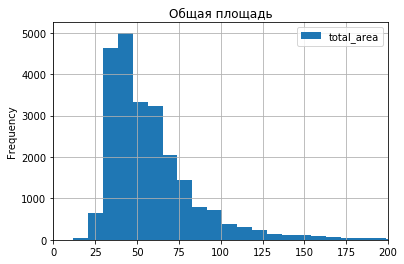

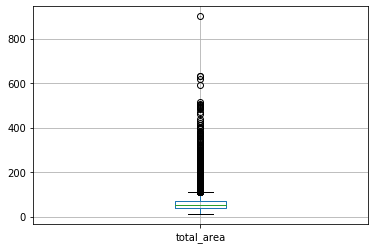

In [23]:
data.plot(y='total_area', kind='hist', title='Общая площадь', bins=100, xlim=(0, 200), grid=True)
plt.show()
data.boxplot(column='total_area', grid=True)

In [24]:
# columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
# for column in data:
#     if column in columns_list:
#         data.plot(y=column, kind='hist', title=column, bins=100,grid=True)
#         plt.show()
#         data.boxplot(column=column)
    

Гистограмма цен

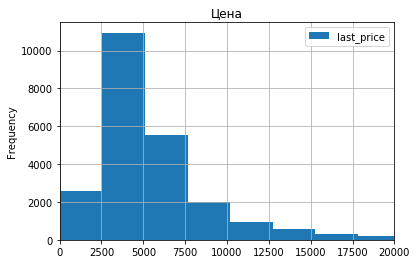

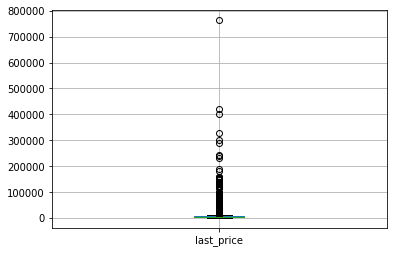

In [25]:
data.plot(y='last_price', kind='hist', title='Цена', bins=300, xlim=(0, 20000), grid=True)
plt.show()
data.boxplot(column='last_price', grid=True)

Гистограмма числа комнат

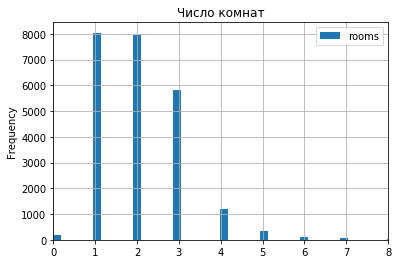

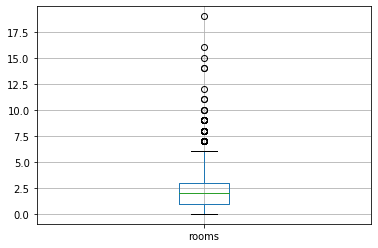

In [26]:
data.plot(y='rooms', kind='hist', title='Число комнат', bins=100, xlim=(0, 8), grid=True)
plt.show()
data.boxplot('rooms', grid=True)

Гистограмма высоты потолков

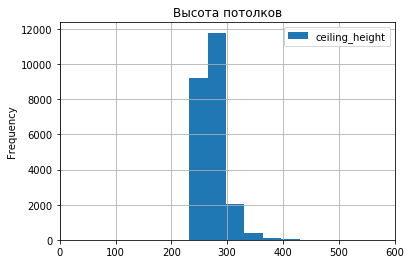

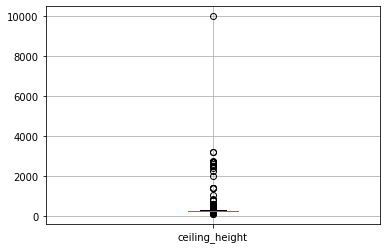

In [27]:
data.plot(y='ceiling_height', kind='hist', title='Высота потолков', bins=300, xlim=(0, 600), grid=True)
plt.show()
data.boxplot(column='ceiling_height', grid=True)

По графикам можно сказать следующее:

- общая площадь 45 кв м;
- цена 4000 тыс.;
- колическтво комнат 1 и 2 распределились поровну;
- потолки 275 см.

Для построения гистограммы времени продажи квартир будем использовать только те данные, которые у нас есть ( без учета -1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c58b47790>]],
      dtype=object)

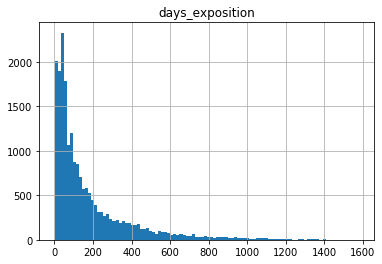

In [28]:
data_days_exposition = data.query('days_exposition != "-1"')
data_days_exposition.hist('days_exposition', bins=100)

Посчитаем среднее и медианное время продажи квартиры

In [29]:
days_exposition_mean = data_days_exposition['days_exposition'].mean()
days_exposition_median = data_days_exposition['days_exposition'].median()
print('Среднее время продажи квартиры:', days_exposition_mean)
print('Медианное время продажи квартиры:', days_exposition_median)

Среднее время продажи квартиры: 180.88863436982163
Медианное время продажи квартиры: 95.0


Построим диаграмму boxplot для выявления обычного времени продажи квартиры и аномальных значений.

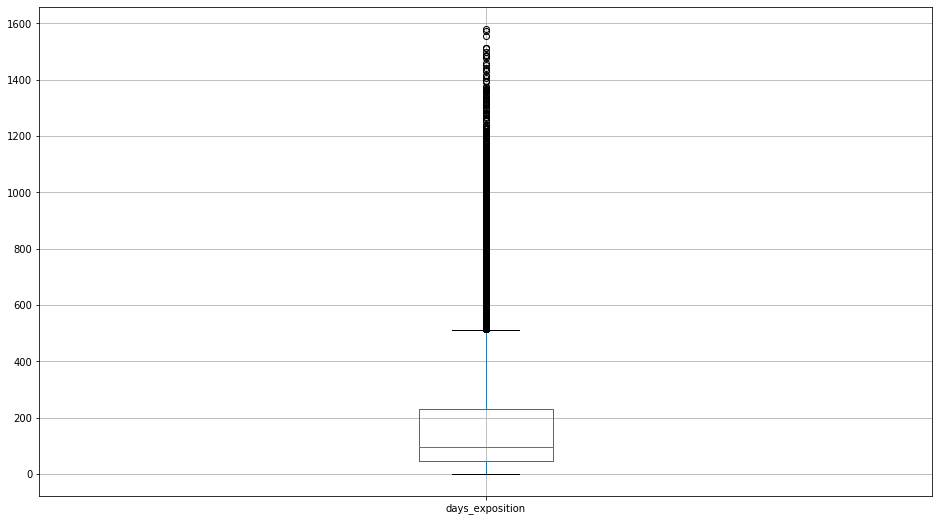

In [30]:
data_days_exposition.boxplot('days_exposition', figsize=(16, 9), grid=True)

Обычно продажа квартиры занимает 95 дней (медиана). Глядя на диаграмму размаха, можно сказать, что необычно быстрым временем продажи будут значения, которые меньше 50 дней, а необычно долгими - больше 230 дней (это значния, лежащие вне "ящика").

Уберем редкие и выбивающиеся значения

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c5987cf50>]],
      dtype=object)

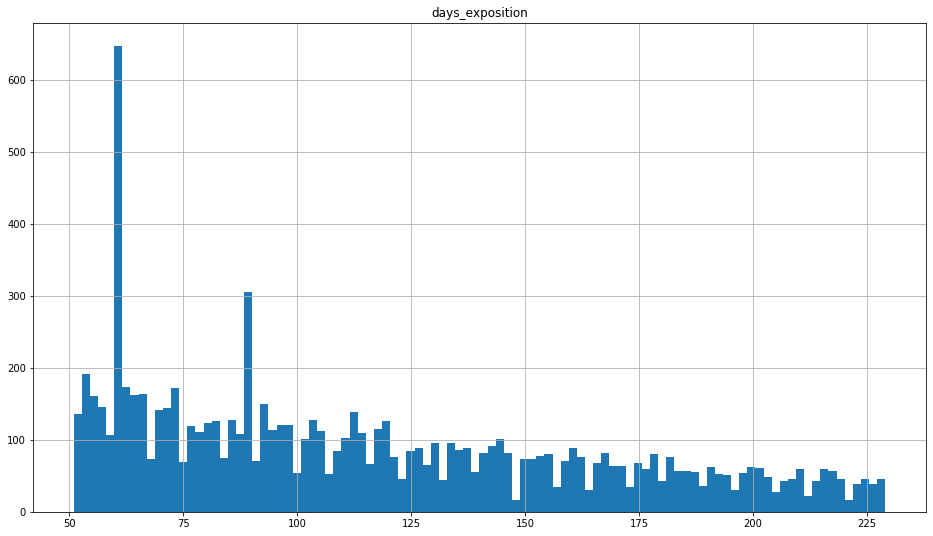

In [31]:
data_days_exposition = data_days_exposition.query('50 < days_exposition < 230')
data_days_exposition.hist('days_exposition', bins=100, figsize=(16, 9)) # гистограмма после "очистки"

Можно заметить, что стали видны явные пики продаж квартир около значения 60 и 85 дней. 

Изучим зависимость цены от площади, числа комнат, удаленности от центра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1c58ef9cd0>,
      dtype=object)

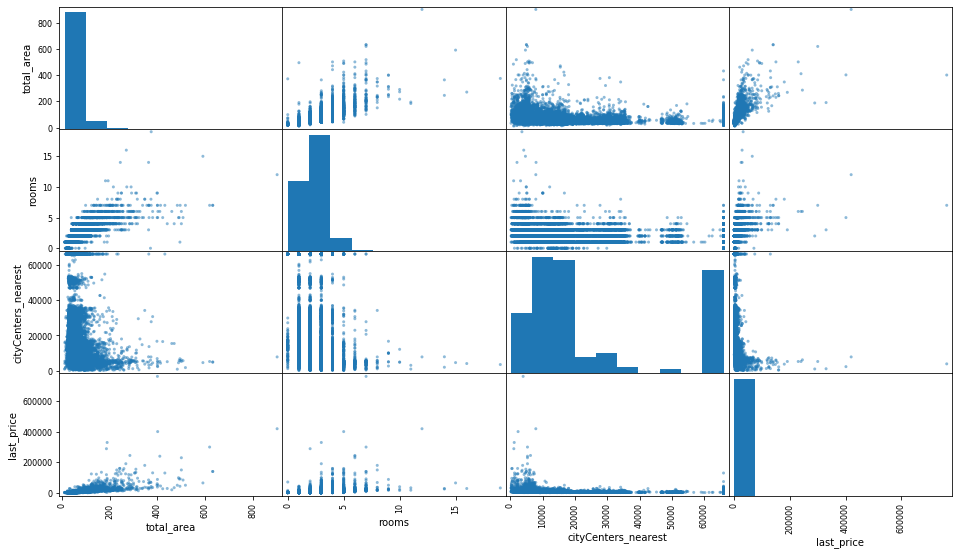

In [32]:
#создадим датафрейм, состоящий из этих столбцов
data_scatter = data[['total_area', 'rooms', 'cityCenters_nearest', 'last_price']]

#построим попарные диаграммы для всех столшбцов
pd.plotting.scatter_matrix(data_scatter, figsize=(16, 9))

In [33]:
data_scatter.corr()

,total_area,rooms,cityCenters_nearest,last_price
total_area,1.000000,0.758347,-0.216784,0.653654
rooms,0.758347,1.000000,-0.164400,0.363343
cityCenters_nearest,-0.216784,-0.164400,1.000000,-0.228346
last_price,0.653654,0.363343,-0.228346,1.000000


По попарным диаграмм и таблице коэффициентов корреляции можно сделать вывод, что цена больше всего зависит от площади квартиры. Количество комнат и близость к центру меньше влияют на цену.

Изучим влияние этажа на стоимость квартиры.

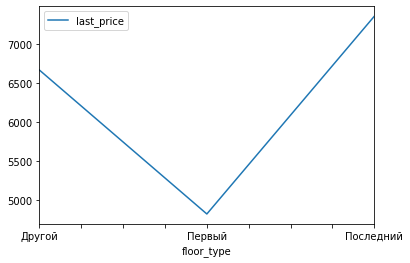

In [34]:
# создадим сводную таблицу по типу этажа и цене
data_price_floor = data.pivot_table(index='floor_type', values='last_price')

#построим график
data_price_floor.plot()


Можно увидеть, что самые дешевые квартиры на первом этаже, а самые дорогие - на последнем

Изучим зависимость цены от дня недели, месяца и года размещения объявления

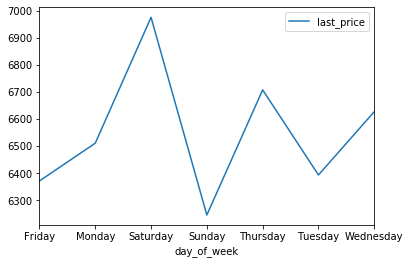

In [35]:
#цена в зависимости от дня недели
data_price_weekday = data.pivot_table(index='day_of_week', values = 'last_price')
data_price_weekday.plot()

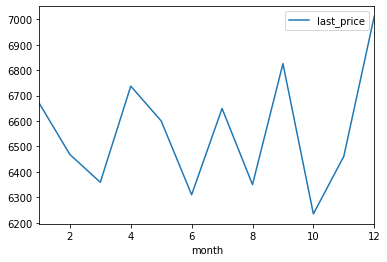

In [36]:
# цена в зависимости от месяца
data_price_date = data.pivot_table(index='month', values = 'last_price')
data_price_date.plot()

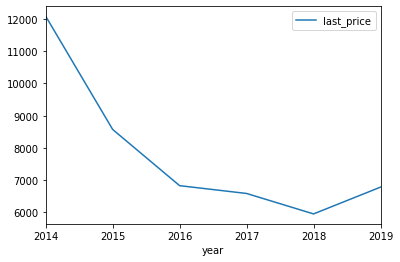

In [37]:
# цена в зависимости от года
data_price_date = data.pivot_table(index='year', values = 'last_price')
data_price_date.plot()

По графикам видно, что цены не сильно зависят от месяца и дня недели. Зато хорошо видна тенденция к снижению стоимости квартир с 2014 по 2018 год.

Выберем 10 населенных пунктов с наибольшим числом объявлений

In [38]:
#сгруппируем и отсортируем данные по населенному пункту
top_10_cities = data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False)

#создадим список из названий 10 самых популярных населенных пунктов
top_10_cities_names = top_10_cities.iloc[0:10]
top_10 = top_10_cities_names.index

#выберем все данные по этим населенным пунктам
data_top_10_cities = data.query('locality_name in @top_10')

Посчитаем среднюю цену за квадратный метр в этих населенных пунктах

In [39]:
#создадим отсортированную по убыванию сводную таблицу по квадратным метрам и населенным пунктам
sq_meter_price_mean = data_top_10_cities.pivot_table(index='locality_name', values='sq_meter_price', aggfunc='mean').sort_values('sq_meter_price', ascending=False)
sq_meter_price_mean

,sq_meter_price
locality_name,
Санкт-Петербург,115.347447
Пушкин,103.611238
деревня Кудрово,93.001599
посёлок Парголово,90.675533
посёлок Мурино,86.379380
посёлок Шушары,79.068530
Колпино,75.735411
Гатчина,69.045502
Всеволожск,68.984643


Самая высокая цена за квадратный метр в Санкт-Петербурге, самая низкая - в Выборге

Изучение предложений квартир в Санкт-Петербурге

Выделим квартиры в Санкт-Петербурге

In [40]:
#Выделим квартиры в Санкт-Петербурге
spb_flats = data.query('locality_name == "Санкт-Петербург"')

#Создадим столбец с расстояниями до центра в километрах
data['center_distance'] = data['cityCenters_nearest'] / 1000

#Приведем к типу int
data['center_distance'] = data['center_distance'].astype('int')
data['center_distance'].head()


0    16
1    18
2    13
3     6
4     8
Name: center_distance, dtype: int64

Посчитаем среднюю цену для каждого километра

In [41]:
km_price_mean = data.pivot_table(index='center_distance', values='last_price', aggfunc='mean')
km_price_mean.head()

,last_price
center_distance,
0,23442.302326
1,18843.566116
2,16163.306189
3,13409.845283
4,13579.390830


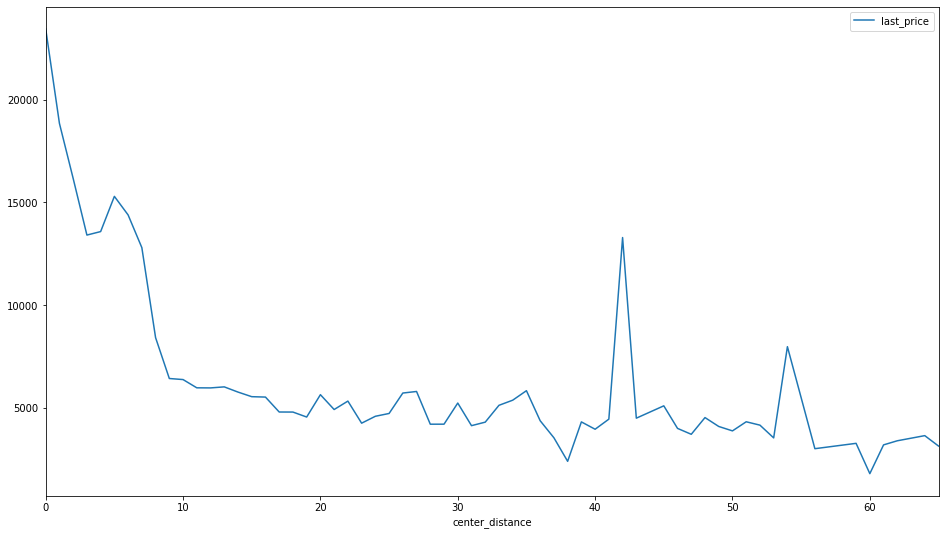

In [42]:
km_price_mean.plot(figsize=(16, 9))

На интервале от 0 до 10 км виден явный скачок цен. Будем считать эту зону центральной.

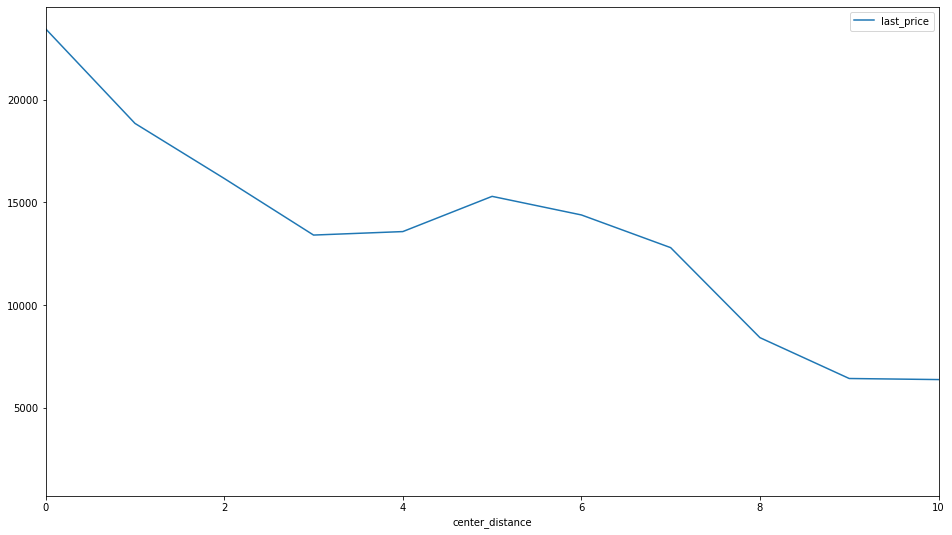

In [43]:
km_price_mean.plot(figsize=(16, 9), xlim=(0, 10))

График изменяет свой вид на 5 километре. Значит это - зона центра.

Выделим сегмент квартир в центре

In [44]:
data_center = data.query('center_distance <= 5')
len(data_center)


2851

Построим диаграммы площади, цены, числа комнат, высоты потолков

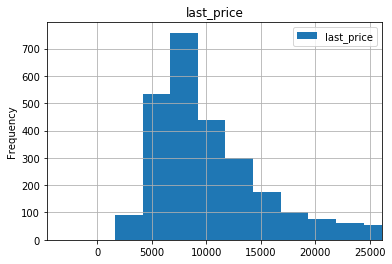

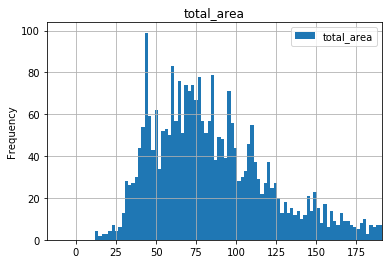

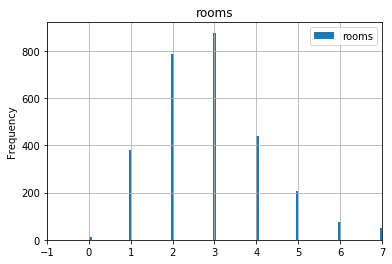

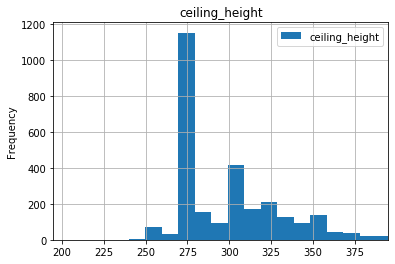

In [45]:
#Библиотеку numpy будем использовать для определения масштаба графика по оси х
#Будем брать масштаб от IRQ-1.5*IRQ до IRQ+1.5IRQ

import numpy as np

columns_list = ['total_area', 'last_price', 'rooms', 'ceiling_height']
for column in data_center:
    if column in columns_list:
        q1 = np.quantile(data_center[column], 0.25) #первый квантиль
        q3 = np.quantile(data_center[column], 0.75) #третий квантиль
        razmah = q3 - q1
        interval_plus = int(q3 + razmah * 1.5)
        interval_minus = int(q1 - razmah * 1.5)
        data_center.plot(y=column, kind='hist', title=column, bins=300, grid=True, xlim=(interval_minus, interval_plus))

               

По графикам видно, что в центре города:

- цена за квартиру около 8000 тыс.;
- площадь квартиры 75 кв. м
- число комнат варьируется от 2 до 3;
- высота потолков 275 см.

Исследуем влияние на цену числа комнат, этажа, удалённости от центра, даты размещения объявления

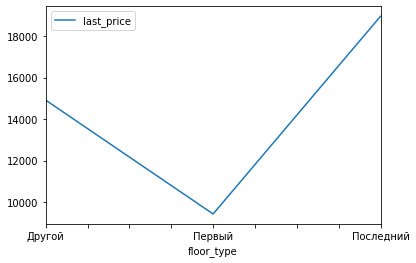

In [46]:
# создадим сводную таблицу по типу этажа и цене
data_center_price_floor = data_center.pivot_table(index='floor_type', values='last_price')

#построим график
data_center_price_floor.plot()

Здесь также самые дорогие квартиры на последнем этаже, самые дешевые - на первом.

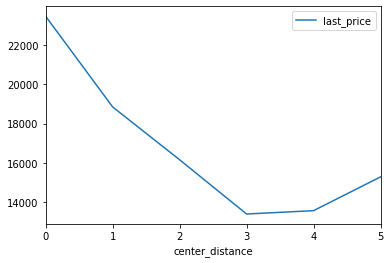

In [47]:
# посчитаем среднюю цену за километр для каждого километра
km_price_mean = data_center.pivot_table(index='center_distance', values='last_price', aggfunc='mean')
km_price_mean.plot()

Здесь всё также: чем дальше от центра, тем дешевле

Цена в зависимости от года подачи объявления:

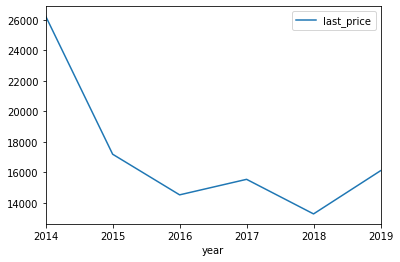

In [48]:
# цена в зависимости от года
data_center_price_date = data_center.pivot_table(index='year', values = 'last_price')
data_center_price_date.plot()

Годы идут, а цены снижаются.

Цена в зависимости от количества комнат:

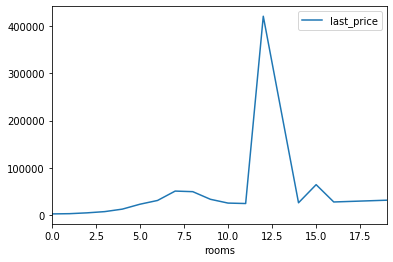

In [49]:
data_center_price_rooms = data.pivot_table(index='rooms', values = 'last_price')
data_center_price_rooms.plot()

Огромный скачок цен на 12-ти комнатные кавртиры. В целом видно, что цена увеличивается с ростом количества комнат.

### Вывод

В этом разделе был проведен исследовательский анализ данных. Были построены графики и диаграммы, позволившие определить параметры, влияющие на цену квартиры. Были посчитаны стоимости квартир по Ленинградской области, выявлены места с самыми высокими и низкими ценами. Проведен анализ недвижимости, находящейся непосредственно в центре города. Исследование показало, что в центре продаются квартиры с бОльшим количеством комнат (3 против одной-двух по всему городу), выше цены (средняя квартира продается за 8 млн, а по всему городу за 4 млн), больше общая площадь (75 кв. м против 45 кв. м).
Остальные зависимости в центре такие же, как и по городу.

### Шаг 5. Общий вывод

В проведенном исследовании были выявлены параметры, влияющие на стоимость недвижимости по региону. Таковыми являются: удаленность от центра, общая площадь, количество комнат и этаж. Также была выявлена закономерность влияния даты размещения объявления от цены. Чем старше объявление, тем квартира дешевле.